# imports

In [1]:
from ulmo.models import DCAE, ConditionalFlow
from ulmo.ood import ood

Cartopy not installed.  Some plots will not work!


# Load up

In [2]:
autoencoder = DCAE(image_shape=(1, 64, 64), latent_dim=512)

In [3]:
flow = ConditionalFlow(
    dim=512, 
    context_dim=None, 
    transform_type='autoregressive', 
    n_layers=10, 
    hidden_units=256,
    n_blocks=2, 
    dropout=0.2, 
    use_batch_norm=False, 
    tails='linear', 
    tail_bound=10, 
    n_bins=5,
    min_bin_height=1e-3, 
    min_bin_width=1e-3, 
    min_derivative=1e-3, 
    unconditional_transform=False, 
    encoder=None)

In [4]:
#filepath = './MODIS_2010_95clear_128x128_preproc_0.5valid.h5'  # Small sample
filepath = './MODIS_2010_95clear_128x128_inpaintT_preproc_0.8valid.h5'

# Train the AutoEncoder

In [5]:
pae = ood.ProbabilisticAutoencoder(autoencoder=autoencoder, flow=flow, filepath=filepath, 
                               logdir='./2010_128x128_tst')

134,144 training samples. 536,576 validation samples.


Training stopped. Save model (y/n)? y


Model saved.
Loading autoencoder model from: ./2010_128x128_tst/autoencoder.pt


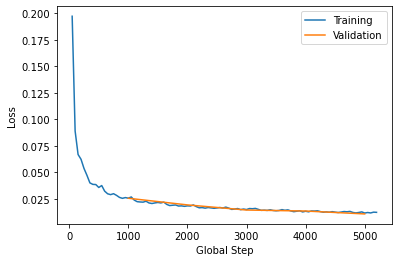

In [6]:
pae.train_autoencoder(n_epochs=10, batch_size=256, lr=2.5e-3, summary_interval=50, eval_interval=1000)

# Flow

Existing latents file found. Use file (y) or recompute (n)? y


134,144 training samples. 536,640 validation samples.


Training stopped. Save model (y/n)? y


Model saved.
Loading flow model from: ./2010_128x128_tst/flow.pt


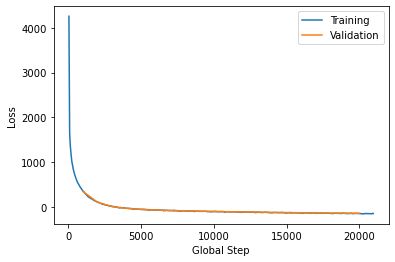

In [6]:
pae.train_flow(n_epochs=10, batch_size=64, lr=2.5e-4, summary_interval=50, eval_interval=1000)

# Probabilities

Existing log probs file found. Use file (y) or recompute (n)? n


135,168 training samples. 537,600 validation samples.


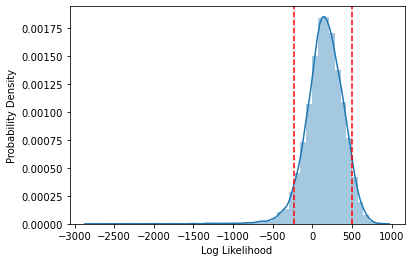

In [7]:
pae.plot_log_probs()

# Plot

In [8]:
pae.plot_grid('least likely', vmin=-5, vmax=5, grad_vmax=3, save_figure=True)

> /home/jovyan/Oceanography/python/ulmo/ulmo/ood/ood.py(565)plot_grid()
    563             fields = f['valid'][idx]
    564             import pdb; pdb.set_trace()  # Update metadata loading
--> 565             if 'valid_metadata' in f.keys():
    566                 meta = f['valid_metadata']
    567                 df = pd.DataFrame(meta[idx].astype(np.unicode_), columns=meta.attrs['columns'])



ipdb>  c


AttributeError: 'list' object has no attribute 'encode'

# Save

In [9]:
pae.save_log_probs()

Saved log probabilities to ./2010_128x128_tst/MODIS_2010_95clear_128x128_inpaintT_preproc_0.8valid_log_probs.csv.
